In [1]:
%config Completer.use_jedi = False
%pip install -Uqq fastai duckduckgo_search

import warnings
import pathlib

warnings.filterwarnings('ignore')


Note: you may need to restart the kernel to use updated packages.


In [6]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [7]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos'


'http://2.bp.blogspot.com/-TA1D79yxcnM/Tyy6ng42rbI/AAAAAAAAAnc/-4s-bZaYc_U/s1600/colorfull+bird+HD+wallpaper.jpg'

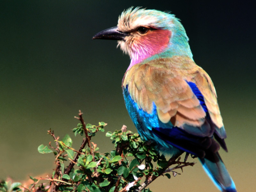

In [8]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

Searching for 'forest photos'


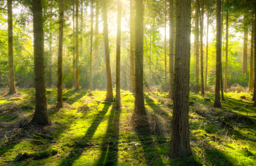

In [9]:
download_url(search_images("forest photos", max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256, 256)

In [11]:
searches = 'forest', 'bird'
path = pathlib.Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)
    

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [12]:
failed = verify_images(get_image_files(path))
failed.map(pathlib.Path.unlink)
len(failed)

2

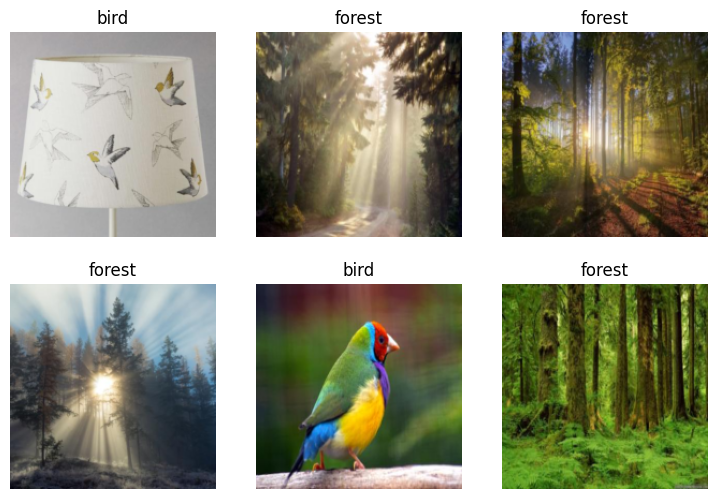

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/ahnafs/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:15<00:00, 3.11MB/s]
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch,train_loss,valid_loss,error_rate,time
0,0.832081,0.486559,1.000000,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.143578,0.110661,1.000000,00:07
1,0.095644,0.005622,1.000000,00:04
2,0.065981,0.011641,1.000000,00:04


In [17]:
from fastcore.all import *

is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f'This is a: {is_bird}.')
print(f'Probability its a bird: {probs[0]:.4f}')

This is a: bird.
Probability its a bird: 1.0000
